Analyse des Einflusses verschiedener Faktoren auf die Schlafqualität

Datenvorverarbeitung

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelle und Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Modellierungsalgorithmen
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Metriken
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Warnungen ignorieren (optional)
import warnings
warnings.filterwarnings('ignore')


# Daten einlesen
df = pd.read_csv('../data/final_dataset_with_normalized_and_standardized_features.csv')

df.head()


Heart_Rate_Variability  Movement_During_Sleep  Sleep_Duration_Hours  \
0               79.934283               1.324822              4.638289   
1               67.234714               1.855481              6.209422   
2               82.953771               1.207580              6.879592   
3              100.460597               1.692038             10.331531   
4               65.316933               0.106385              8.334830   

   Sleep_Quality_Score  Caffeine_Intake_mg  Bedtime_Consistency  \
0                  1.0          107.624032             0.657037   
1                  1.0          104.658589             0.144464   
2                 10.0            0.000000             0.642949   
3                  1.0          116.990981             0.453255   
4                  1.0          223.282908             0.641492   

   Light_Exposure_hours  Caffeine_Squared_Smoothed  \
0              7.933949                        NaN   
1              6.992699                        NaN   
2              7.655250                        NaN   
3              9.429463                        NaN   
4             10.555713                        NaN   

   Heart_Rate_Variability_normalized  Movement_During_Sleep_normalized  ...  \
0                           0.526922                          0.337521  ...   
1                           0.437412                          0.413921  ...   
2                           0.548204                          0.320641  ...   
3                           0.671595                          0.390390  ...   
4                           0.423895                          0.162099  ...   

   Bedtime_Consistency_normalized  Light_Exposure_hours_normalized  \
0                        0.657037                         0.527254   
1                        0.144464                         0.462017   
2                        0.642949                         0.507937   
3                        0.453255                         0.630907   
4                        0.641492                         0.708967   

   Caffeine_Squared_Smoothed_normalized  Heart_Rate_Variability_standardized  \
0                                   NaN                             0.487759   
1                                   NaN                            -0.161022   
2                                   NaN                             0.642015   
3                                   NaN                             1.536382   
4                                   NaN                            -0.258995   

   Movement_During_Sleep_standardized  Sleep_Duration_Hours_standardized  \
0                           -0.692816                          -1.840107   
1                           -0.152959                          -0.819843   
2                           -0.812090                          -0.384647   
3                           -0.319235                           1.856976   
4                           -1.932372                           0.560356   

   Caffeine_Intake_mg_standardized  Bedtime_Consistency_standardized  \
0                        -0.432369                          0.748966   
1                        -0.463922                         -1.763224   
2                        -1.577492                          0.679919   
3                        -0.332705                         -0.249796   
4                         0.798244                          0.672775   

   Light_Exposure_hours_standardized  Caffeine_Squared_Smoothed_standardized  
0                          -0.050799                                     NaN  
1                          -0.516221                                     NaN  
2                          -0.188608                                     NaN  
3                           0.688691                                     NaN  
4                           1.245590                                     NaN  

[5 rows x 22 columns]

In [10]:
df.describe()


Heart_Rate_Variability  Movement_During_Sleep  Sleep_Duration_Hours  \
count             1000.000000            1000.000000           1000.000000   
mean                70.386641               2.005834              7.471921   
std                 19.584319               0.983454              1.540699   
min                  5.174653              -1.019512              3.105827   
25%                 57.048194               1.352000              6.393869   
50%                 70.506012               1.999749              7.500277   
75%                 82.958878               2.660915              8.500418   
max                147.054630               5.926238             12.364639   

       Sleep_Quality_Score  Caffeine_Intake_mg  Bedtime_Consistency  \
count          1000.000000         1000.000000          1000.000000   
mean              2.592946          148.260148             0.504222   
std               2.979500           94.031760             0.204137   
min               1.000000            0.000000             0.000000   
25%               1.000000           80.630719             0.361569   
50%               1.000000          145.717293             0.500996   
75%               2.537789          211.244685             0.644680   
max              10.000000          400.000000             1.000000   

       Light_Exposure_hours  Caffeine_Squared_Smoothed  \
count           1000.000000                 994.000000   
mean               8.036684               30886.414205   
std                2.023371               11385.566159   
min                0.326689                4899.711143   
25%                6.726291               22980.249728   
50%                8.038248               29695.445899   
75%                9.354408               37353.264840   
max               14.754766               76011.610684   

       Heart_Rate_Variability_normalized  Movement_During_Sleep_normalized  \
count                        1000.000000                       1000.000000   
mean                            0.459628                          0.435568   
std                             0.138034                          0.141591   
min                             0.000000                          0.000000   
25%                             0.365616                          0.341434   
50%                             0.460469                          0.434692   
75%                             0.548240                          0.529882   
max                             1.000000                          1.000000   

       ...  Bedtime_Consistency_normalized  Light_Exposure_hours_normalized  \
count  ...                     1000.000000                      1000.000000   
mean   ...                        0.504222                         0.534374   
std    ...                        0.204137                         0.140238   
min    ...                        0.000000                         0.000000   
25%    ...                        0.361569                         0.443552   
50%    ...                        0.500996                         0.534483   
75%    ...                        0.644680                         0.625705   
max    ...                        1.000000                         1.000000   

       Caffeine_Squared_Smoothed_normalized  \
count                            994.000000   
mean                               0.365434   
std                                0.160108   
min                                0.000000   
25%                                0.254255   
50%                                0.348686   
75%                                0.456373   
max                                1.000000   

       Heart_Rate_Variability_standardized  \
count                         1.000000e+03   
mean                         -1.119105e-16   
std                           1.000500e+00   
min                          -3.331472e+00   
25%                          -6.814187e-01   
50%                       

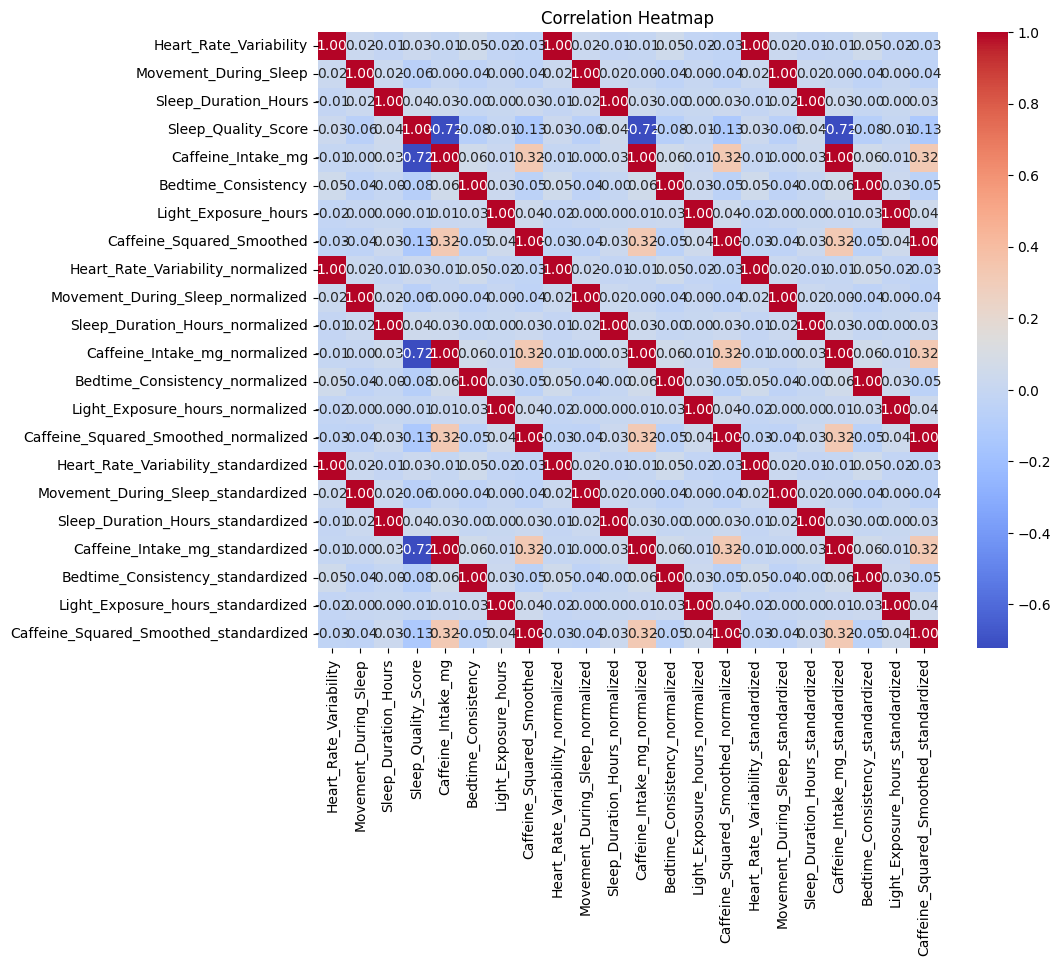

In [15]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
# Anzahl fehlender Werte pro Spalte
print(df.isnull().sum())

# Falls fehlende Werte vorhanden sind, können wir sie entweder entfernen oder imputieren
# Beispiel: Fehlende Werte mit dem Median ersetzen
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


Heart_Rate_Variability                    0
Movement_During_Sleep                     0
Sleep_Duration_Hours                      0
Sleep_Quality_Score                       0
Caffeine_Intake_mg                        0
Bedtime_Consistency                       0
Light_Exposure_hours                      0
Caffeine_Squared_Smoothed                 6
Heart_Rate_Variability_normalized         0
Movement_During_Sleep_normalized          0
Sleep_Duration_Hours_normalized           0
Caffeine_Intake_mg_normalized             0
Bedtime_Consistency_normalized            0
Light_Exposure_hours_normalized           0
Caffeine_Squared_Smoothed_normalized      6
Heart_Rate_Variability_standardized       0
Movement_During_Sleep_standardized        0
Sleep_Duration_Hours_standardized         0
Caffeine_Intake_mg_standardized           0
Bedtime_Consistency_standardized          0
Light_Exposure_hours_standardized         0
Caffeine_Squared_Smoothed_standardized    6
dtype: int64


In [14]:
print(df_imputed.isnull().sum())


Heart_Rate_Variability                    0
Movement_During_Sleep                     0
Sleep_Duration_Hours                      0
Sleep_Quality_Score                       0
Caffeine_Intake_mg                        0
Bedtime_Consistency                       0
Light_Exposure_hours                      0
Caffeine_Squared_Smoothed                 0
Heart_Rate_Variability_normalized         0
Movement_During_Sleep_normalized          0
Sleep_Duration_Hours_normalized           0
Caffeine_Intake_mg_normalized             0
Bedtime_Consistency_normalized            0
Light_Exposure_hours_normalized           0
Caffeine_Squared_Smoothed_normalized      0
Heart_Rate_Variability_standardized       0
Movement_During_Sleep_standardized        0
Sleep_Duration_Hours_standardized         0
Caffeine_Intake_mg_standardized           0
Bedtime_Consistency_standardized          0
Light_Exposure_hours_standardized         0
Caffeine_Squared_Smoothed_standardized    0
dtype: int64


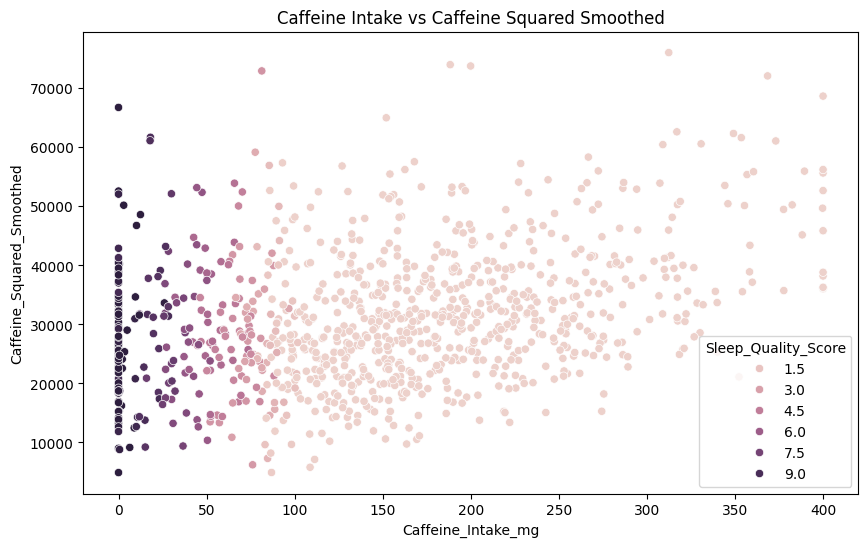

                           Caffeine_Intake_mg  Caffeine_Squared_Smoothed  \
Caffeine_Intake_mg                   1.000000                   0.322199   
Caffeine_Squared_Smoothed            0.322199                   1.000000   
Sleep_Quality_Score                 -0.721968                  -0.131093   

                           Sleep_Quality_Score  
Caffeine_Intake_mg                   -0.721968  
Caffeine_Squared_Smoothed            -0.131093  
Sleep_Quality_Score                   1.000000  


ValueError: array must not contain infs or NaNs

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisierung der Beziehung zwischen Caffeine_Intake_mg und Caffeine_Squared_Smoothed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Caffeine_Intake_mg', y='Caffeine_Squared_Smoothed', hue='Sleep_Quality_Score', data=df)
plt.title('Caffeine Intake vs Caffeine Squared Smoothed')
plt.show()

# Korrelation zwischen den Caffeine-Features und Sleep_Quality_Score
correlation = df_imputed[['Caffeine_Intake_mg', 'Caffeine_Squared_Smoothed', 'Sleep_Quality_Score']].corr()
print(correlation)

# Partielle Korrelation
from scipy.stats import pearsonr

def partial_correlation(x, y, z):
    xy, _ = pearsonr(x, y)
    xz, _ = pearsonr(x, z)
    yz, _ = pearsonr(y, z)
    return (xy - xz * yz) / (((1 - xz**2) * (1 - yz**2))**0.5)

partial_corr = partial_correlation(df['Caffeine_Intake_mg'], df['Sleep_Quality_Score'], df['Caffeine_Squared_Smoothed'])
print(f"Partial correlation between Caffeine_Intake_mg and Sleep_Quality_Score, controlling for Caffeine_Squared_Smoothed: {partial_corr}")


In [19]:
# Überprüfen Sie auf NaN oder unendliche Werte
print(df_imputed.isna().sum())
print(np.isinf(df).sum())

# Entfernen Sie Zeilen mit NaN oder unendlichen Werten
df_clean = df_imputed.replace([np.inf, -np.inf], np.nan).dropna()

# Überprüfen Sie die Größe des bereinigten Datensatzes
print(f"Originale Datengröße: {df.shape}")
print(f"Bereinigte Datengröße: {df_clean.shape}")


Heart_Rate_Variability                    0
Movement_During_Sleep                     0
Sleep_Duration_Hours                      0
Sleep_Quality_Score                       0
Caffeine_Intake_mg                        0
Bedtime_Consistency                       0
Light_Exposure_hours                      0
Caffeine_Squared_Smoothed                 0
Heart_Rate_Variability_normalized         0
Movement_During_Sleep_normalized          0
Sleep_Duration_Hours_normalized           0
Caffeine_Intake_mg_normalized             0
Bedtime_Consistency_normalized            0
Light_Exposure_hours_normalized           0
Caffeine_Squared_Smoothed_normalized      0
Heart_Rate_Variability_standardized       0
Movement_During_Sleep_standardized        0
Sleep_Duration_Hours_standardized         0
Caffeine_Intake_mg_standardized           0
Bedtime_Consistency_standardized          0
Light_Exposure_hours_standardized         0
Caffeine_Squared_Smoothed_standardized    0
dtype: int64
Heart_Rate_Variabil

In [30]:
df_imputed = df_imputed[['Caffeine_Intake_mg', 'Movement_During_Sleep', 'Sleep_Duration_Hours', 
                        'Light_Exposure_hours', 'Bedtime_Consistency', 'Heart_Rate_Variability', 
                        'Sleep_Quality_Score']]


                        Caffeine_Intake_mg  Movement_During_Sleep  \
Caffeine_Intake_mg                1.000000               0.002097   
Movement_During_Sleep             0.002097               1.000000   
Sleep_Duration_Hours              0.033951               0.021586   
Light_Exposure_hours              0.011756               0.001739   
Bedtime_Consistency               0.056263              -0.039408   
Heart_Rate_Variability           -0.008619               0.022129   
Sleep_Quality_Score              -0.721968              -0.064108   

                        Sleep_Duration_Hours  Light_Exposure_hours  \
Caffeine_Intake_mg                  0.033951              0.011756   
Movement_During_Sleep               0.021586              0.001739   
Sleep_Duration_Hours                1.000000              0.004894   
Light_Exposure_hours                0.004894              1.000000   
Bedtime_Consistency                -0.002974              0.026786   
Heart_Rate_Variability     

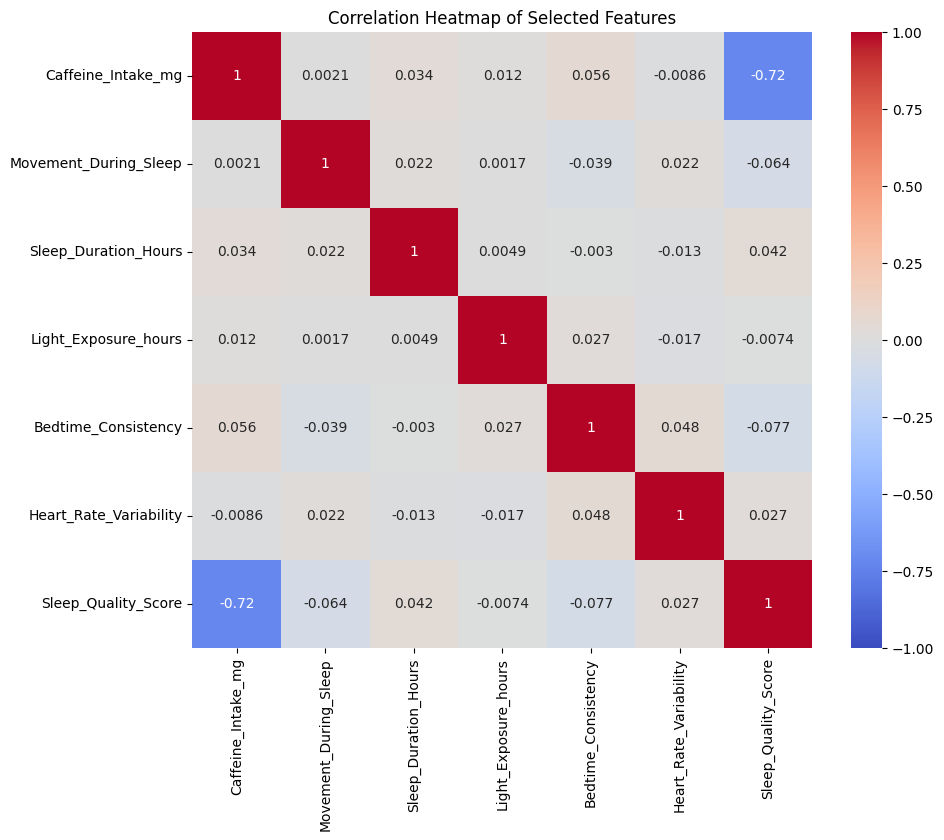

In [31]:
correlation = df_imputed.corr()
print(correlation)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


Caffeine_Intake_mg:

Hat die stärkste Korrelation mit Sleep_Quality_Score (-0.722)
Dies ist eine starke negative Korrelation, was bedeutet, dass höhere Koffeinaufnahme stark mit niedrigerer Schlafqualität verbunden ist
Movement_During_Sleep:

Zeigt eine schwache negative Korrelation mit Sleep_Quality_Score (-0.064)
Mehr Bewegung während des Schlafes ist leicht mit niedrigerer Schlafqualität verbunden
Sleep_Duration_Hours:

Hat eine sehr schwache positive Korrelation mit Sleep_Quality_Score (0.042)
Längerer Schlaf ist minimal mit besserer Schlafqualität verbunden
Light_Exposure_hours:

Zeigt eine vernachlässigbare negative Korrelation mit Sleep_Quality_Score (-0.007)
Lichtexposition scheint kaum Einfluss auf die Schlafqualität zu haben
Bedtime_Consistency:

Hat eine schwache negative Korrelation mit Sleep_Quality_Score (-0.077)
Überraschenderweise scheint konsistentere Schlafenszeit leicht mit niedrigerer Schlafqualität verbunden zu sein
Heart_Rate_Variability:

Zeigt eine sehr schwache positive Korrelation mit Sleep_Quality_Score (0.027)
Höhere Herzfrequenzvariabilität ist minimal mit besserer Schlafqualität verbunden
Wichtige Beobachtungen:

Koffeinaufnahme ist bei weitem der stärkste Prädiktor für die Schlafqualität.
Die meisten anderen Variablen zeigen nur schwache oder vernachlässigbare Korrelationen mit der Schlafqualität.
Es gibt keine starken Korrelationen zwischen den unabhängigen Variablen, was gut für die Modellierung ist (keine Multikollinearität).

Clusteranalyse

In [32]:
# Entfernen von Light_Exposure_hours
df_imputed = df_imputed.drop(['Light_Exposure_hours', 'Sleep_Quality_Score'], axis=1)

# Standardisierung der Daten für das Clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)


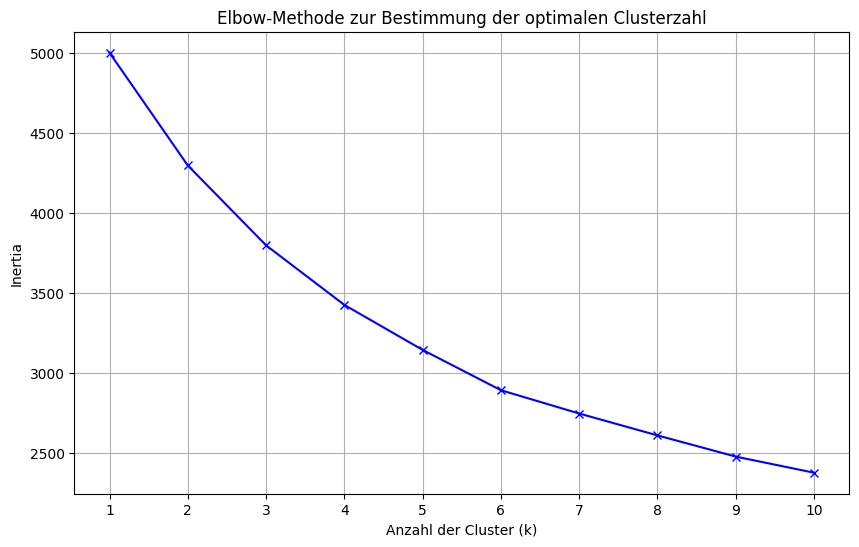

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

inertias = []
k_range = range(1, 11)  # Betrachten Sie Cluster von 1 bis 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Anzahl der Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusterzahl')
plt.xticks(k_range)
plt.grid(True)
plt.show()


Bei k=2 gibt es einen starken Abfall, aber das wären sehr wenige Cluster.

Bei k=3 oder k=4 sehen wir weitere deutliche Abnahmen der Inertia.

Ab k=5 beginnt die Kurve, sich abzuflachen, wobei die Abnahme der Inertia weniger steil wird.

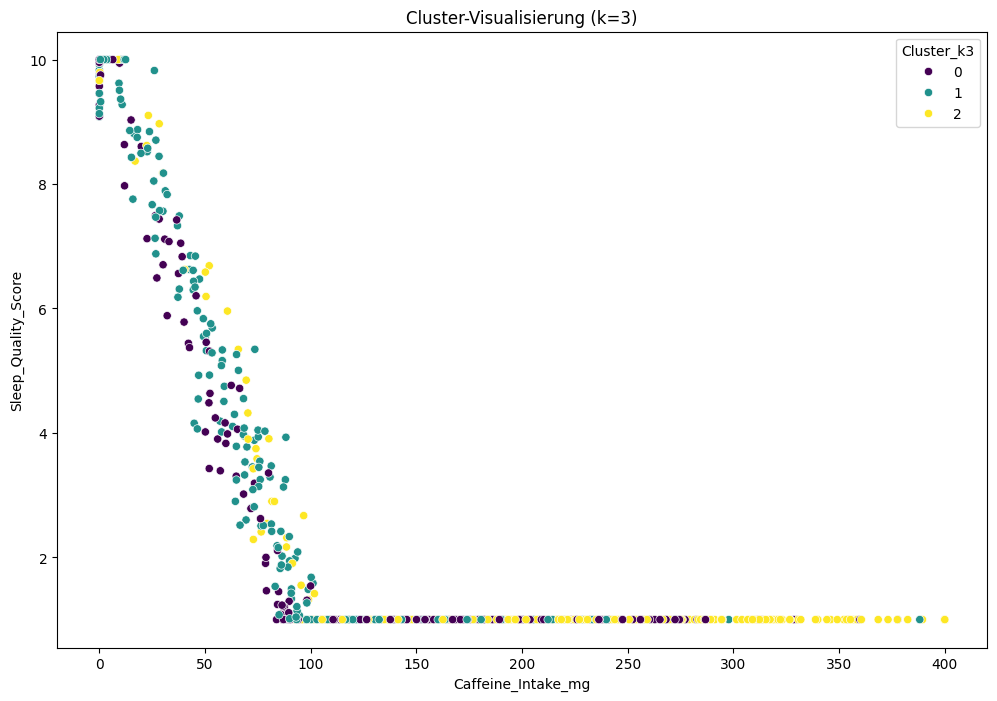

Cluster-Zusammenfassung für k=3:
            Caffeine_Intake_mg  Movement_During_Sleep  Sleep_Duration_Hours  \
Cluster_k3                                                                    
0                   148.132580               2.176215              6.085689   
1                    93.596065               1.804834              7.492476   
2                   205.329033               2.054517              8.758117   

            Light_Exposure_hours  Bedtime_Consistency  Heart_Rate_Variability  \
Cluster_k3                                                                      
0                       8.062947             0.607398               76.783770   
1                       8.038578             0.392282               58.063065   
2                       8.009936             0.523516               77.190926   

            Sleep_Quality_Score   Cluster  Cluster_k4  
Cluster_k3                                             
0                      2.182021  0.794304    1.278481

<Figure size 2000x2000 with 0 Axes>

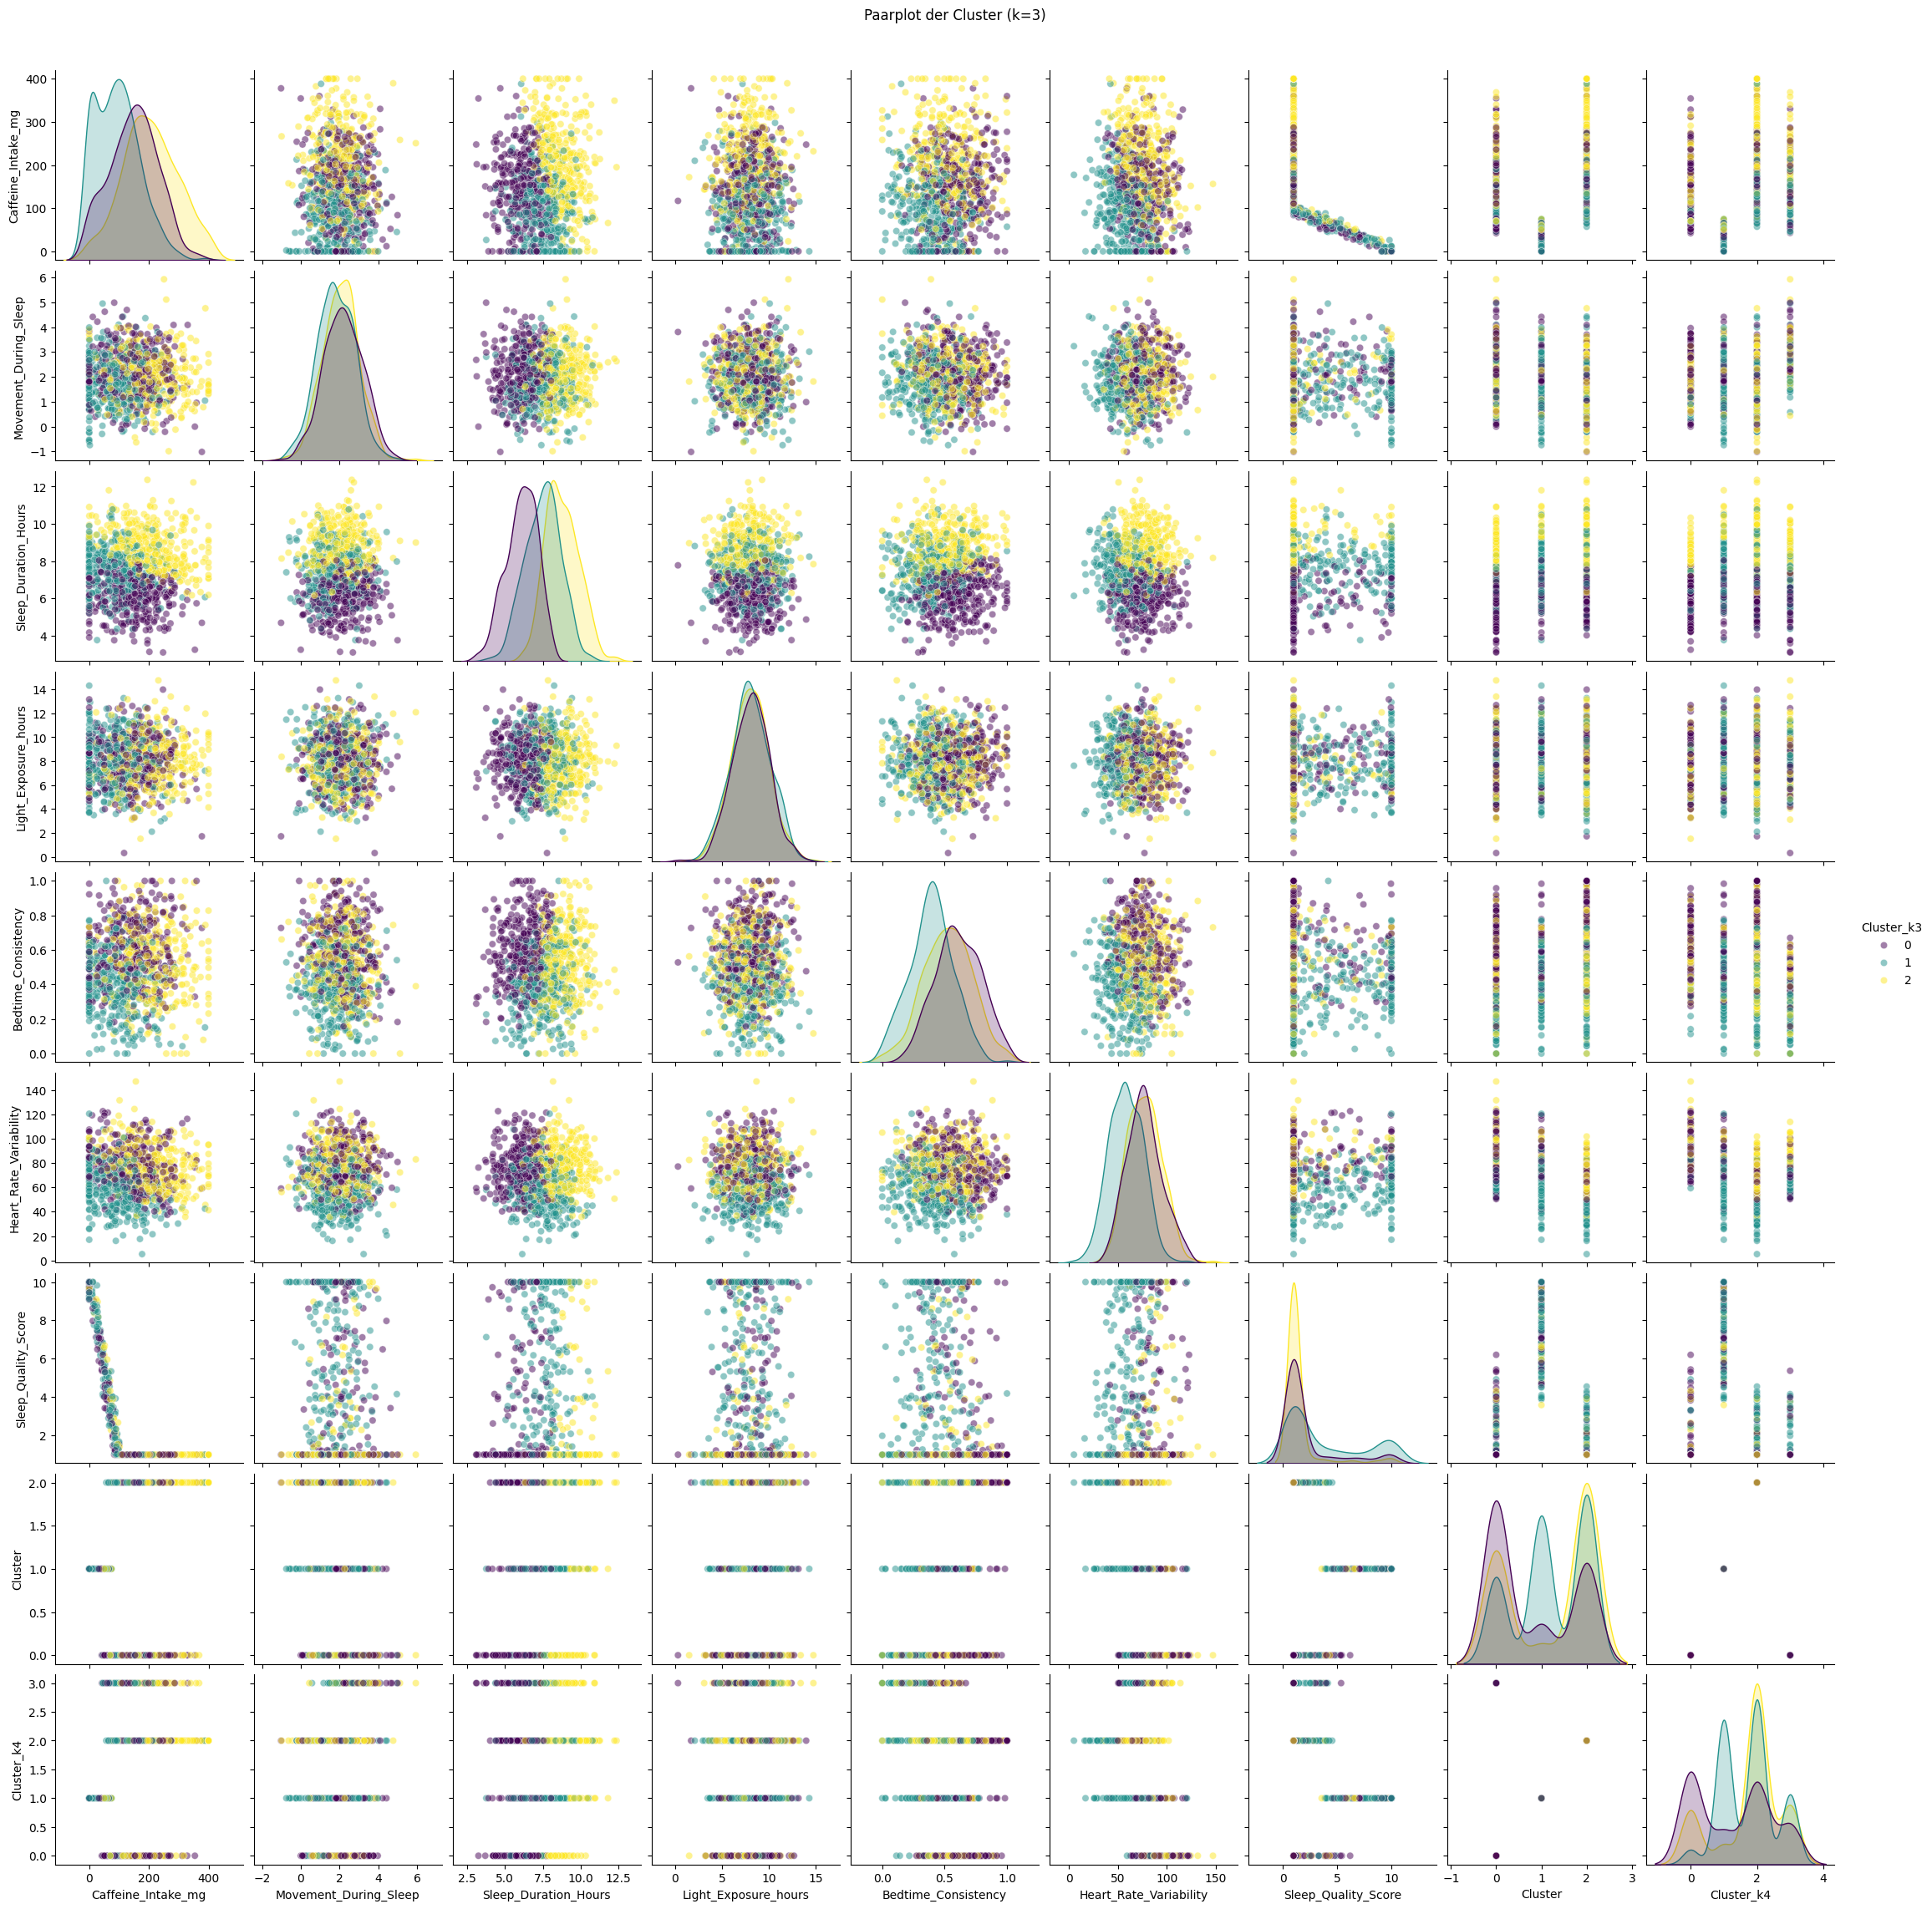

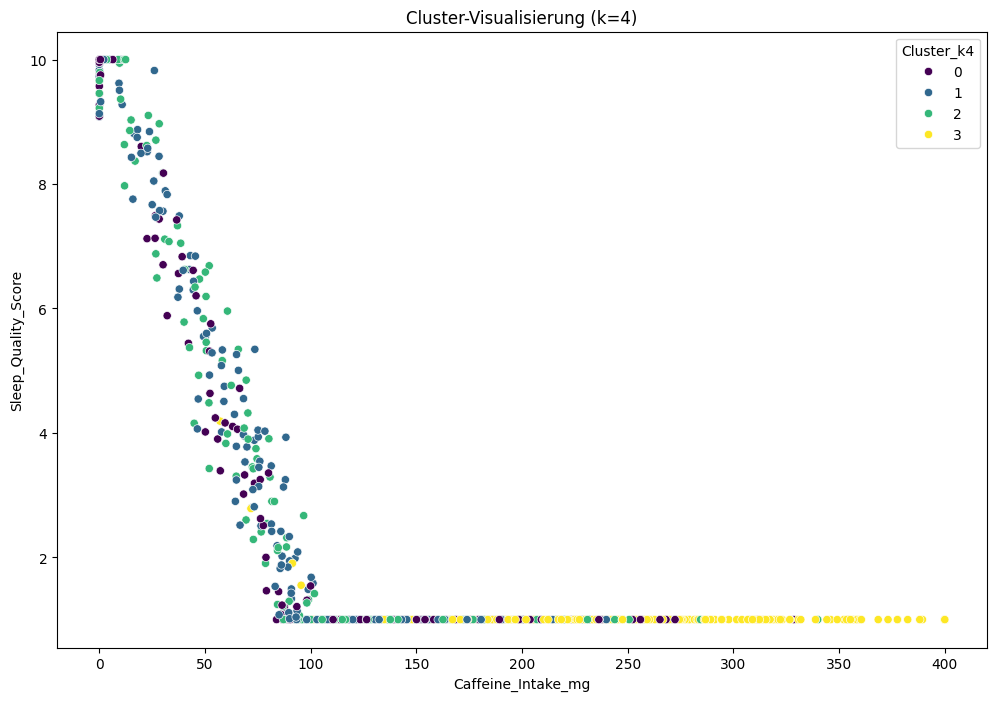

Cluster-Zusammenfassung für k=4:
            Caffeine_Intake_mg  Movement_During_Sleep  Sleep_Duration_Hours  \
Cluster_k4                                                                    
0                   135.801116               1.971834              5.656734   
1                    94.585735               1.860084              7.538192   
2                   113.549833               2.387798              8.337059   
3                   244.324851               1.835376              8.156727   

            Light_Exposure_hours  Bedtime_Consistency  Heart_Rate_Variability  \
Cluster_k4                                                                      
0                       8.170749             0.585865               76.501104   
1                       8.056437             0.381194               53.878633   
2                       7.767196             0.458553               88.982215   
3                       8.147540             0.600494               64.998892   

     

<Figure size 2000x2000 with 0 Axes>

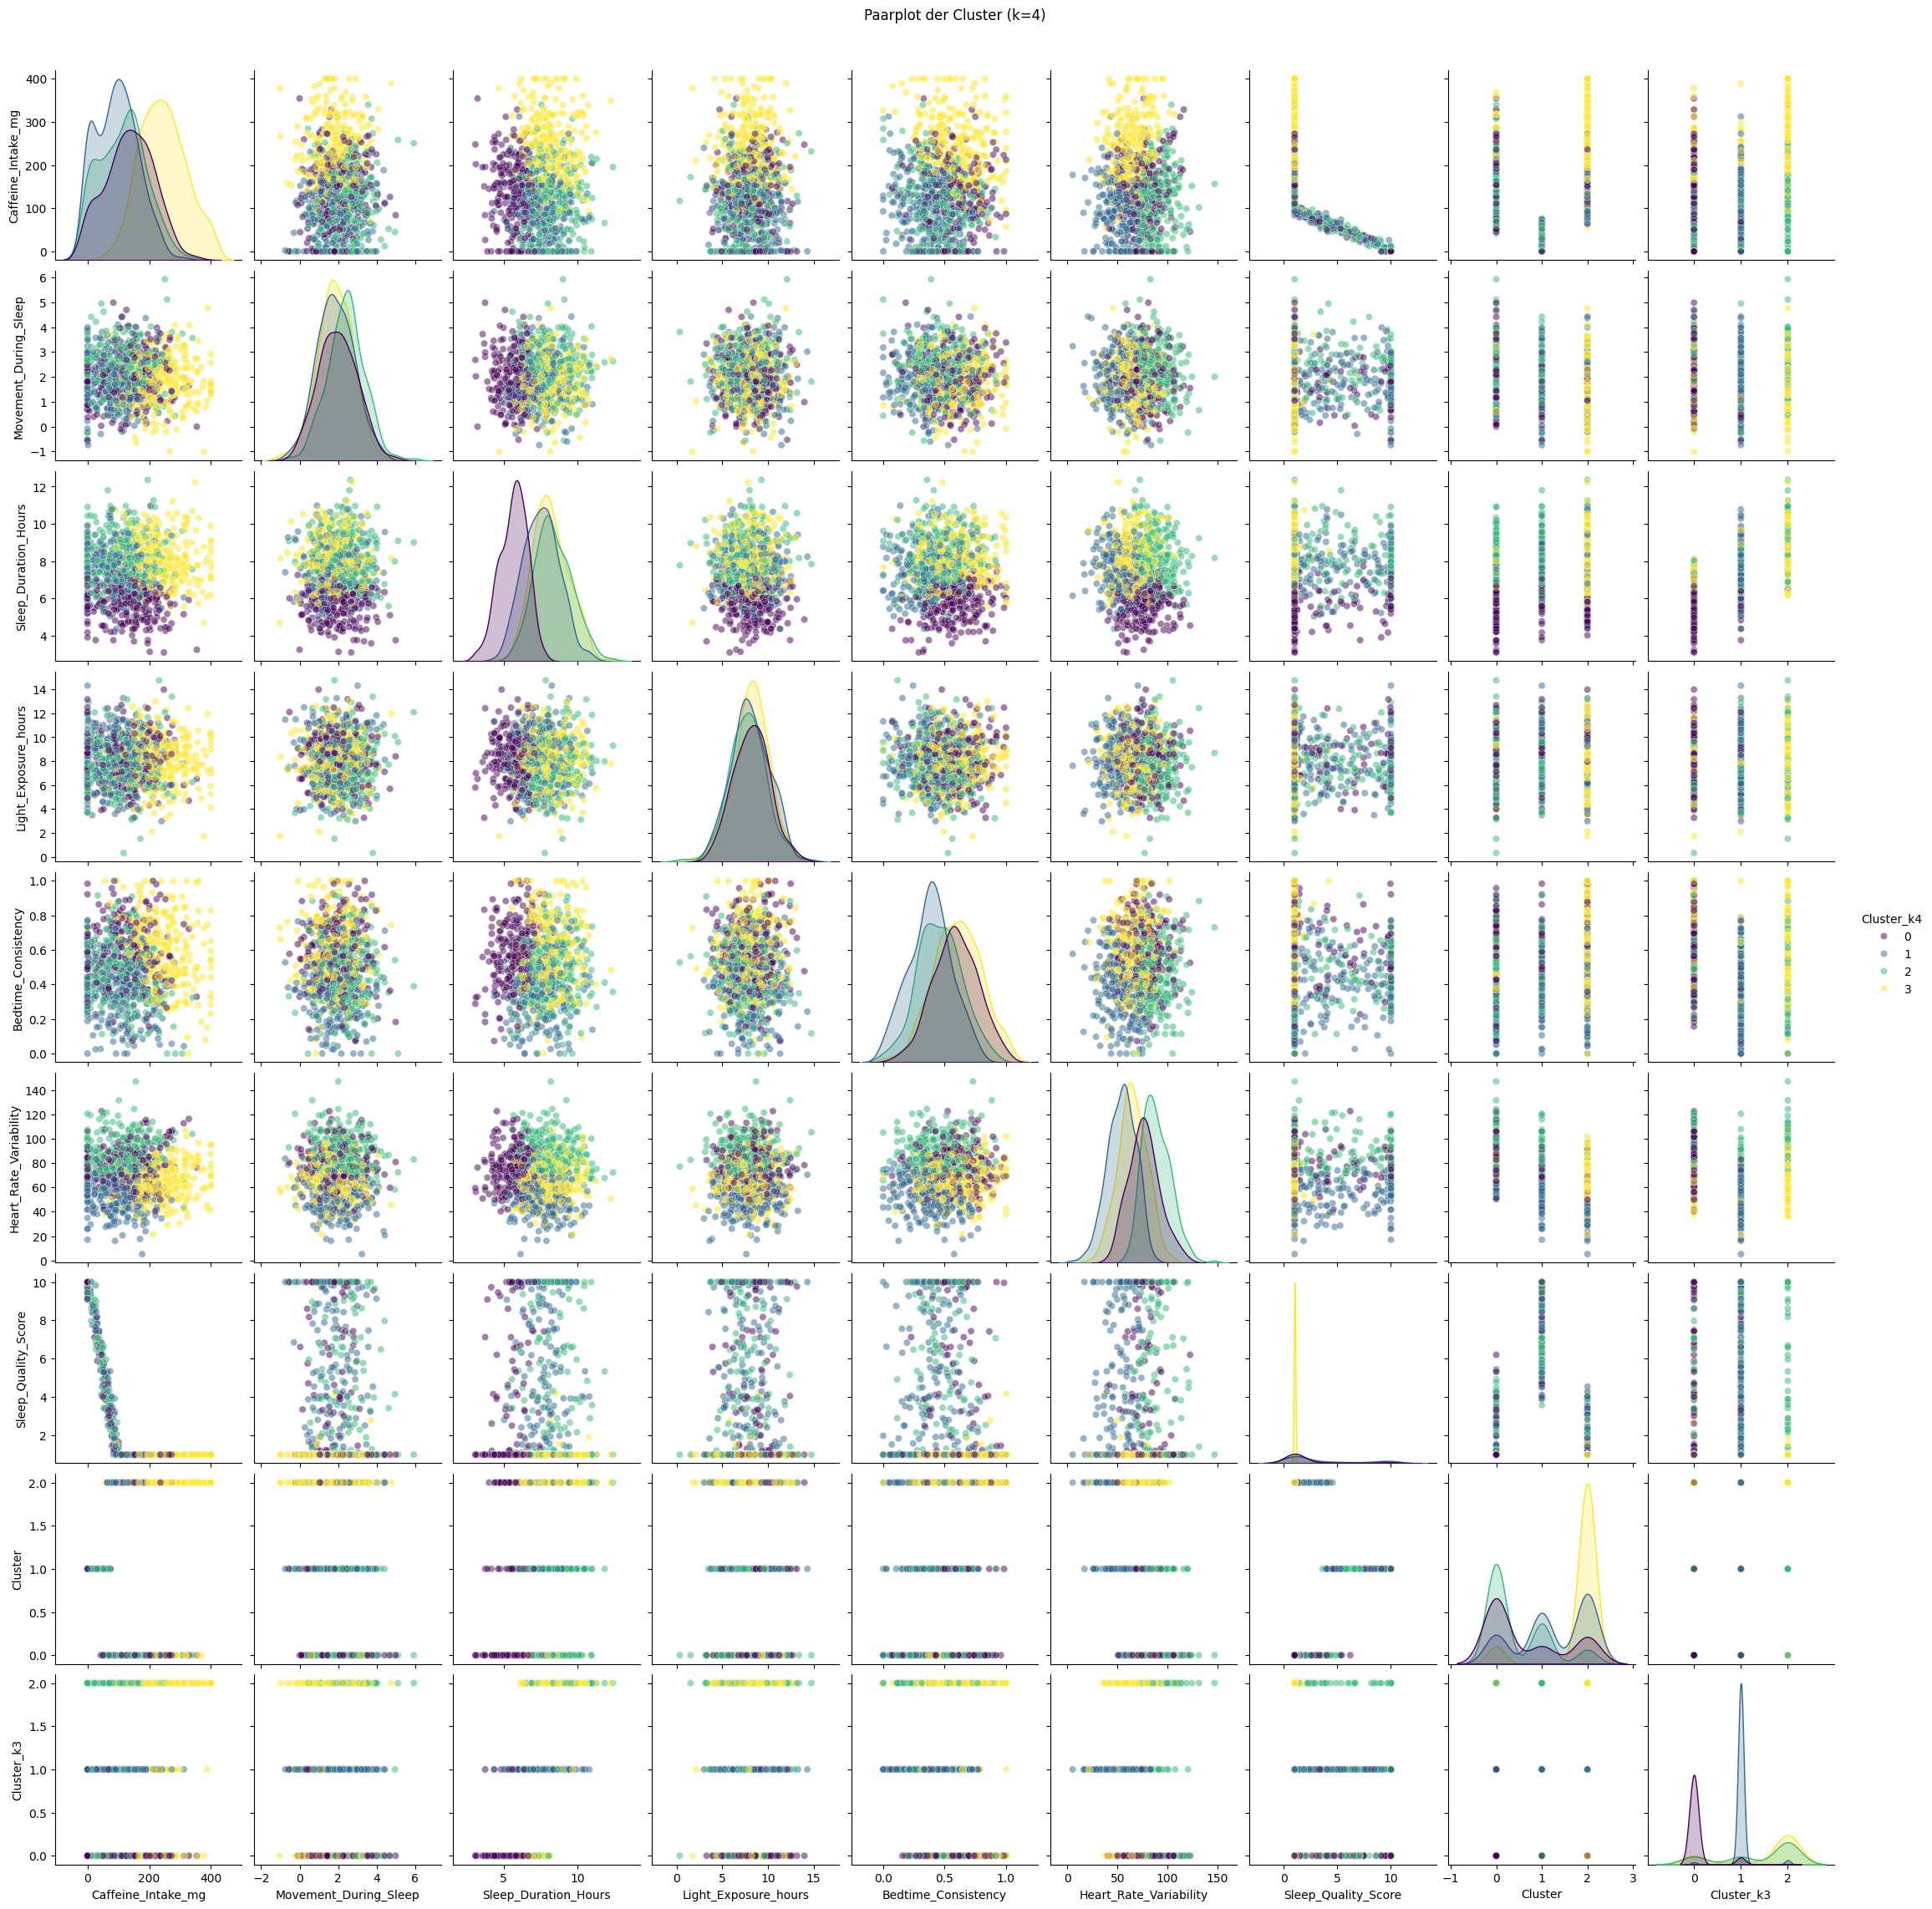

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardisierung der Daten
scaler = StandardScaler()
df_imputed = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

# K-Means Clustering für k=3 und k=4
for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    
    # Fügen Sie die Cluster-Labels zum ursprünglichen DataFrame hinzu
    df_selected[f'Cluster_k{k}'] = cluster_labels
    
    # Visualisierung der Cluster
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_selected, x='Caffeine_Intake_mg', y='Sleep_Quality_Score', hue=f'Cluster_k{k}', palette='viridis')
    plt.title(f'Cluster-Visualisierung (k={k})')
    plt.show()
    
    # Zusammenfassung der Cluster-Eigenschaften
    cluster_summary = df_selected.groupby(f'Cluster_k{k}').mean()
    print(f"Cluster-Zusammenfassung für k={k}:")
    print(cluster_summary)
    print("\n")

    # Paarplot für k=3 und k=4
    plt.figure(figsize=(20, 20))
    sns.pairplot(df_selected, hue=f'Cluster_k{k}', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.5})
    plt.suptitle(f'Paarplot der Cluster (k={k})', y=1.02)
    plt.show()


Die 3-Cluster-Lösung zeigt eine klare Trennung basierend auf Koffeinaufnahme und Schlafqualität.
Die 4-Cluster-Lösung bietet eine feinere Unterteilung, insbesondere bei den Gruppen mit höherer Koffeinaufnahme.
Interpretation der 3-Cluster-Lösung:

Cluster 0: Mittlere Koffeinaufnahme, kürzeste Schlafdauer, niedrige Schlafqualität
Cluster 1: Niedrigste Koffeinaufnahme, mittlere Schlafdauer, höchste Schlafqualität
Cluster 2: Höchste Koffeinaufnahme, längste Schlafdauer, niedrigste Schlafqualität
Interpretation der 4-Cluster-Lösung:

Cluster 0: Mittlere Koffeinaufnahme, kürzeste Schlafdauer, mittlere Schlafqualität
Cluster 1: Niedrigste Koffeinaufnahme, mittlere Schlafdauer, hohe Schlafqualität
Cluster 2: Mittlere Koffeinaufnahme, lange Schlafdauer, mittlere Schlafqualität
Cluster 3: Höchste Koffeinaufnahme, lange Schlafdauer, niedrigste Schlafqualität
Beobachtungen:

Koffeinaufnahme scheint nicht linear mit der Schlafqualität oder -dauer zusammenzuhängen.
Die Gruppe mit der höchsten Koffeinaufnahme hat interessanterweise eine lange Schlafdauer, aber die niedrigste Schlafqualität.
Die Gruppe mit der niedrigsten Koffeinaufnahme hat die beste Schlafqualität, aber nicht die längste Schlafdauer.
Empfehlung:

Die 4-Cluster-Lösung bietet eine nuanciertere Sicht auf die Daten und könnte für weitere Analysen vorteilhaft sein. Sie zeigt deutlicher die Komplexität der Beziehungen zwischen Koffeinaufnahme, Schlafdauer und Schlafqualität.

In [36]:
df_imputed['Caffeine_Sleep_Interaction'] = df_imputed['Caffeine_Intake_mg'] * df_imputed['Sleep_Duration_Hours']

df_imputed.head()

df_imputed.info()

df_imputed.describe()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Caffeine_Intake_mg          1000 non-null   float64
 1   Movement_During_Sleep       1000 non-null   float64
 2   Sleep_Duration_Hours        1000 non-null   float64
 3   Light_Exposure_hours        1000 non-null   float64
 4   Bedtime_Consistency         1000 non-null   float64
 5   Heart_Rate_Variability      1000 non-null   float64
 6   Sleep_Quality_Score         1000 non-null   float64
 7   Cluster                     1000 non-null   float64
 8   Cluster_k3                  1000 non-null   float64
 9   Cluster_k4                  1000 non-null   float64
 10  Caffeine_Sleep_Interaction  1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


Caffeine_Intake_mg  Movement_During_Sleep  Sleep_Duration_Hours  \
count        1.000000e+03           1.000000e+03          1.000000e+03   
mean         8.348877e-17          -1.172396e-16         -2.806644e-16   
std          1.000500e+00           1.000500e+00          1.000500e+00   
min         -1.577492e+00          -3.077784e+00         -2.835258e+00   
25%         -7.195789e-01          -6.651667e-01         -7.000663e-01   
50%         -2.705605e-02          -6.190450e-03          1.841364e-02   
75%          6.701571e-01           6.664355e-01          6.678863e-01   
max          2.678519e+00           3.988355e+00          3.177238e+00   

       Light_Exposure_hours  Bedtime_Consistency  Heart_Rate_Variability  \
count          1.000000e+03         1.000000e+03            1.000000e+03   
mean          -2.469136e-16         1.429967e-16           -1.039169e-16   
std            1.000500e+00         1.000500e+00            1.000500e+00   
min           -3.812377e+00        -2.471260e+00           -3.331472e+00   
25%           -6.479525e-01        -6.991636e-01           -6.814187e-01   
50%            7.735586e-04        -1.581227e-02            6.098290e-03   
75%            6.515780e-01         6.884037e-01            6.422755e-01   
max            3.321904e+00         2.429873e+00            3.916723e+00   

       Sleep_Quality_Score       Cluster    Cluster_k3    Cluster_k4  \
count         1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean         -5.329071e-17 -1.048051e-16 -1.048051e-16 -1.065814e-16   
std           1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min          -5.349029e-01 -1.202302e+00 -1.202302e+00 -1.630004e+00   
25%          -5.349029e-01 -1.202302e+00 -1.202302e+00 -6.150576e-01   
50%          -5.349029e-01 -8.699399e-02 -8.699399e-02  3.998889e-01   
75%          -1.852125e-02  1.028314e+00  1.028314e+00  3.998889e-01   
max           2.487250e+00  1.028314e+00  1.028314e+00  1.414835e+00   

       Caffeine_Sleep_Interaction  
count                 1000.000000  
mean                     0.033951  
std                      0.988033  
min                     -6.005490  
25%                     -0.348343  
50%                      0.006679  
75%                      0.380347  
max                      6.601293

In [37]:
# Specify the file path
file_path = '../data/imputed_dataset.csv'

# Save the DataFrame to a CSV file
df_imputed.to_csv(file_path, index=False)